# DDoS_ML_Sup-V1.1

## Résumé de différentes étapes:


### A - Créer une Dataset 
##### * Analyser les information requise
##### * Analyser la quantiter de paquets moyennés nécéssaire dans chaque info
#### * Créer une pré-dataset
#### * Transformer la pré-dataset en dataset final

### B - Créer un réseau de neurones convenable
##### * Analyser le nombre d'entrée
##### * Entrainer les neurones
##### * Analyser les résultats
##### * Ajuster

### C - Analyser les résultat de l'IA




### A - 1 - Créer une Dataset
- Poids moyen des paquets
- Delta time moyen entre chaque paquets
- Pourcentage d'uttilisation de chaque protocole
- Nombre de paquets par seconde
- Pourcentage de fois la meme IP src/dst
- Pourcentage de fois le meme port src/dst

### A - 2 - Créer une Dataset
1er éssaie: Un éssai sur des groupes de 100 paquets

### A - 3 - Créer une Dataset

#### Note:
Pourquoi pas rajouter l'écart moyen entre la len moyenne ?
Pourquoi pas rajouter le timeflow de chaque ?

###### Pré-Dataset:
Timestamp | Delta time | Len paquets fwd | Len paquets bwd | Ip src | port src | Ip dst | Port dst | Protocole | Label


###### Dataset final:
   Delta Time | Len paquets Fwd| Len paquets Bwd | Paquet/s | % meme Ip src | % meme port src | % meme Ip dst | % meme port dst |  totalité protocole

###### Création et utilisation de: ds_create.py

In [52]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import sys
import datetime

### Importation de la dataset

In [53]:
path_to_clean_csv = "/run/media/Thytu/VDA/SmartShark/Datasets/DDoS/ds/Syn/Syn_ds_benign_5.csv"
path_to_bad_csv = "/run/media/Thytu/VDA/SmartShark/Datasets/DDoS/ds/Syn/Syn_ds_ddos_5.csv"

### Avoir une idée de la dataset

In [54]:
clean_csv = pd.read_csv(path_to_clean_csv, names=["Delta Time", "Len paquets Fwd", "Len paquets Bwd", "Proto maj", "% meme Ip src", "% meme port src", "% meme Ip dst", "% meme port dst"])
bad_csv = pd.read_csv(path_to_bad_csv, names=["Delta Time", "Len paquets Fwd", "Len paquets Bwd", "Proto maj", "% meme Ip src", "% meme port src", "% meme Ip dst", "% meme port dst"])

In [55]:
clean_csv.tail()

,Delta Time,Len paquets Fwd,Len paquets Bwd,Proto maj,% meme Ip src,% meme port src,% meme Ip dst,% meme port dst
7152,102814.0,5392.0,16275.0,17,60.0,20.0,40.0,40.0
7153,123612.0,200.0,484.0,17,60.0,20.0,60.0,60.0
7154,92420.0,298.0,458.0,17,100.0,20.0,100.0,100.0
7155,40951.0,437.0,428.0,6,60.0,20.0,60.0,60.0
7156,74018.0,4740.0,220022.0,17,60.0,20.0,60.0,60.0


In [56]:
bad_csv.tail()

,Delta Time,Len paquets Fwd,Len paquets Bwd,Proto maj,% meme Ip src,% meme port src,% meme Ip dst,% meme port dst
856945,122645.0,6342.0,0.0,17,60.0,80.0,60.0,40.0
856946,1042480.0,5422.0,0.0,17,60.0,100.0,60.0,40.0
856947,1219865.0,5348.0,0.0,17,60.0,100.0,60.0,40.0
856948,1238451.0,4320.0,12.0,17,60.0,80.0,60.0,40.0
856949,8007105.0,5914.0,6722.0,17,80.0,60.0,80.0,40.0


### Préparation finale de la dataset
#### Mélange des deux dataset pour en former plus qu'une seul et création des labels

In [57]:
clean_csv = clean_csv.values.reshape(len(clean_csv), 8)
bad_csv = bad_csv.values.reshape(len(bad_csv), 8)

def create_mixed_data_set_with_label(cleaned, bad):
    dataset = []
    label = []
    index_cleaned = 0
    index_bad = 0
    index = 0
    while (index < (len(cleaned) + len(bad) - 1)):
        if (index % 2 and index_cleaned < len(cleaned)):
            dataset.append(cleaned[index_cleaned])
            index_cleaned += 1
            label.append(0)
        else:
            dataset.append(bad[index_bad])
            index_bad += 1
            label.append(1)
        index += 1
    return (dataset, label)
dataset, label = create_mixed_data_set_with_label(clean_csv, bad_csv)
print(dataset[0], label[0])

[104. 162.  48.   6.  80.  20.  80.  20.] 1


#### Création de la DS de test

In [58]:
test = dataset[0:int(len(dataset) * 0.2)]
test_label = label[0:int(len(label) * 0.2)]
dataset = dataset[int(len(dataset) * 0.2):]
label = label[int(len(label) * 0.2):]

#### Diminiuer l'effet des grands nombres pour facilité l'apprentissage du réseau

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(dataset[0])
dataset = scaler.fit_transform(dataset)
test = scaler.fit_transform(test)
print(dataset[0])

[201.  60.   0.   6. 100.  20. 100.  40.]
[-0.01974031 -0.1985336  -0.43576927 -0.0268499   0.03055886 -0.02719831
  0.03055886  2.83360184]


In [60]:
test = dataset[0:int(len(dataset) * 0.2)]
test_label = label[0:int(len(label) * 0.2)]
dataset = dataset[int(len(dataset) * 0.2):]
label = label[int(len(label) * 0.2):]

#### Transformation de la list en np.array

In [61]:
label = np.array(label)
test_label = np.array(test_label)
print(dataset.shape, dataset.dtype)
print(label.shape, label.dtype)
#print(test.shape, test.dtype)
#print(test_label.shape, test_label.dtype)
print(np.shape(test))
print(np.shape(test_label))

(553028, 8) float64
(553028,) int64
(138257, 8)
(138257,)


#### Création du model 

In [62]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation="relu", input_shape=(8,)),
    tf.keras.layers.Dropout(0.3),
    #tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(2, activation="softmax")
])
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

##### Logs creation

In [63]:
logs_path = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs_path, histogram_freq=1)

#### Entrainement du model

In [64]:
history = model.fit(dataset, label, epochs=2, validation_data=(test, test_label), callbacks=[tensorboard_callback])

Train on 553028 samples, validate on 138257 samples
Epoch 1/2
553028/553028 [==============================] - 40s 72us/sample - loss: 0.0139 - accuracy: 0.9993 - val_loss: 4.6462e-04 - val_accuracy: 1.0000
Epoch 2/2
553028/553028 [==============================] - 40s 73us/sample - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.7165e-04 - val_accuracy: 1.0000


#### Résultat sous graphique du model

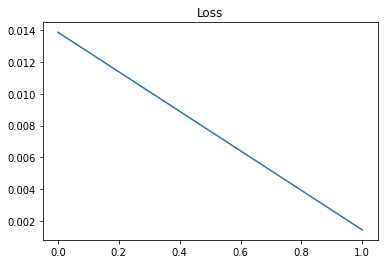

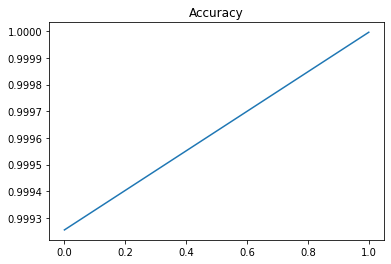

In [65]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

plt.plot(loss_curve)
plt.title("Loss")
plt.show()

plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()

In [66]:
model.evaluate(test, test_label, batch_size=100)

138257/138257 [==============================] - 1s 7us/sample - loss: 1.7165e-04 - accuracy: 1.0000


[0.00017164946635002295, 1.0]